<a href="https://colab.research.google.com/github/gunaydinrumeysa/Machine_Learning/blob/main/Health_Insurance_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

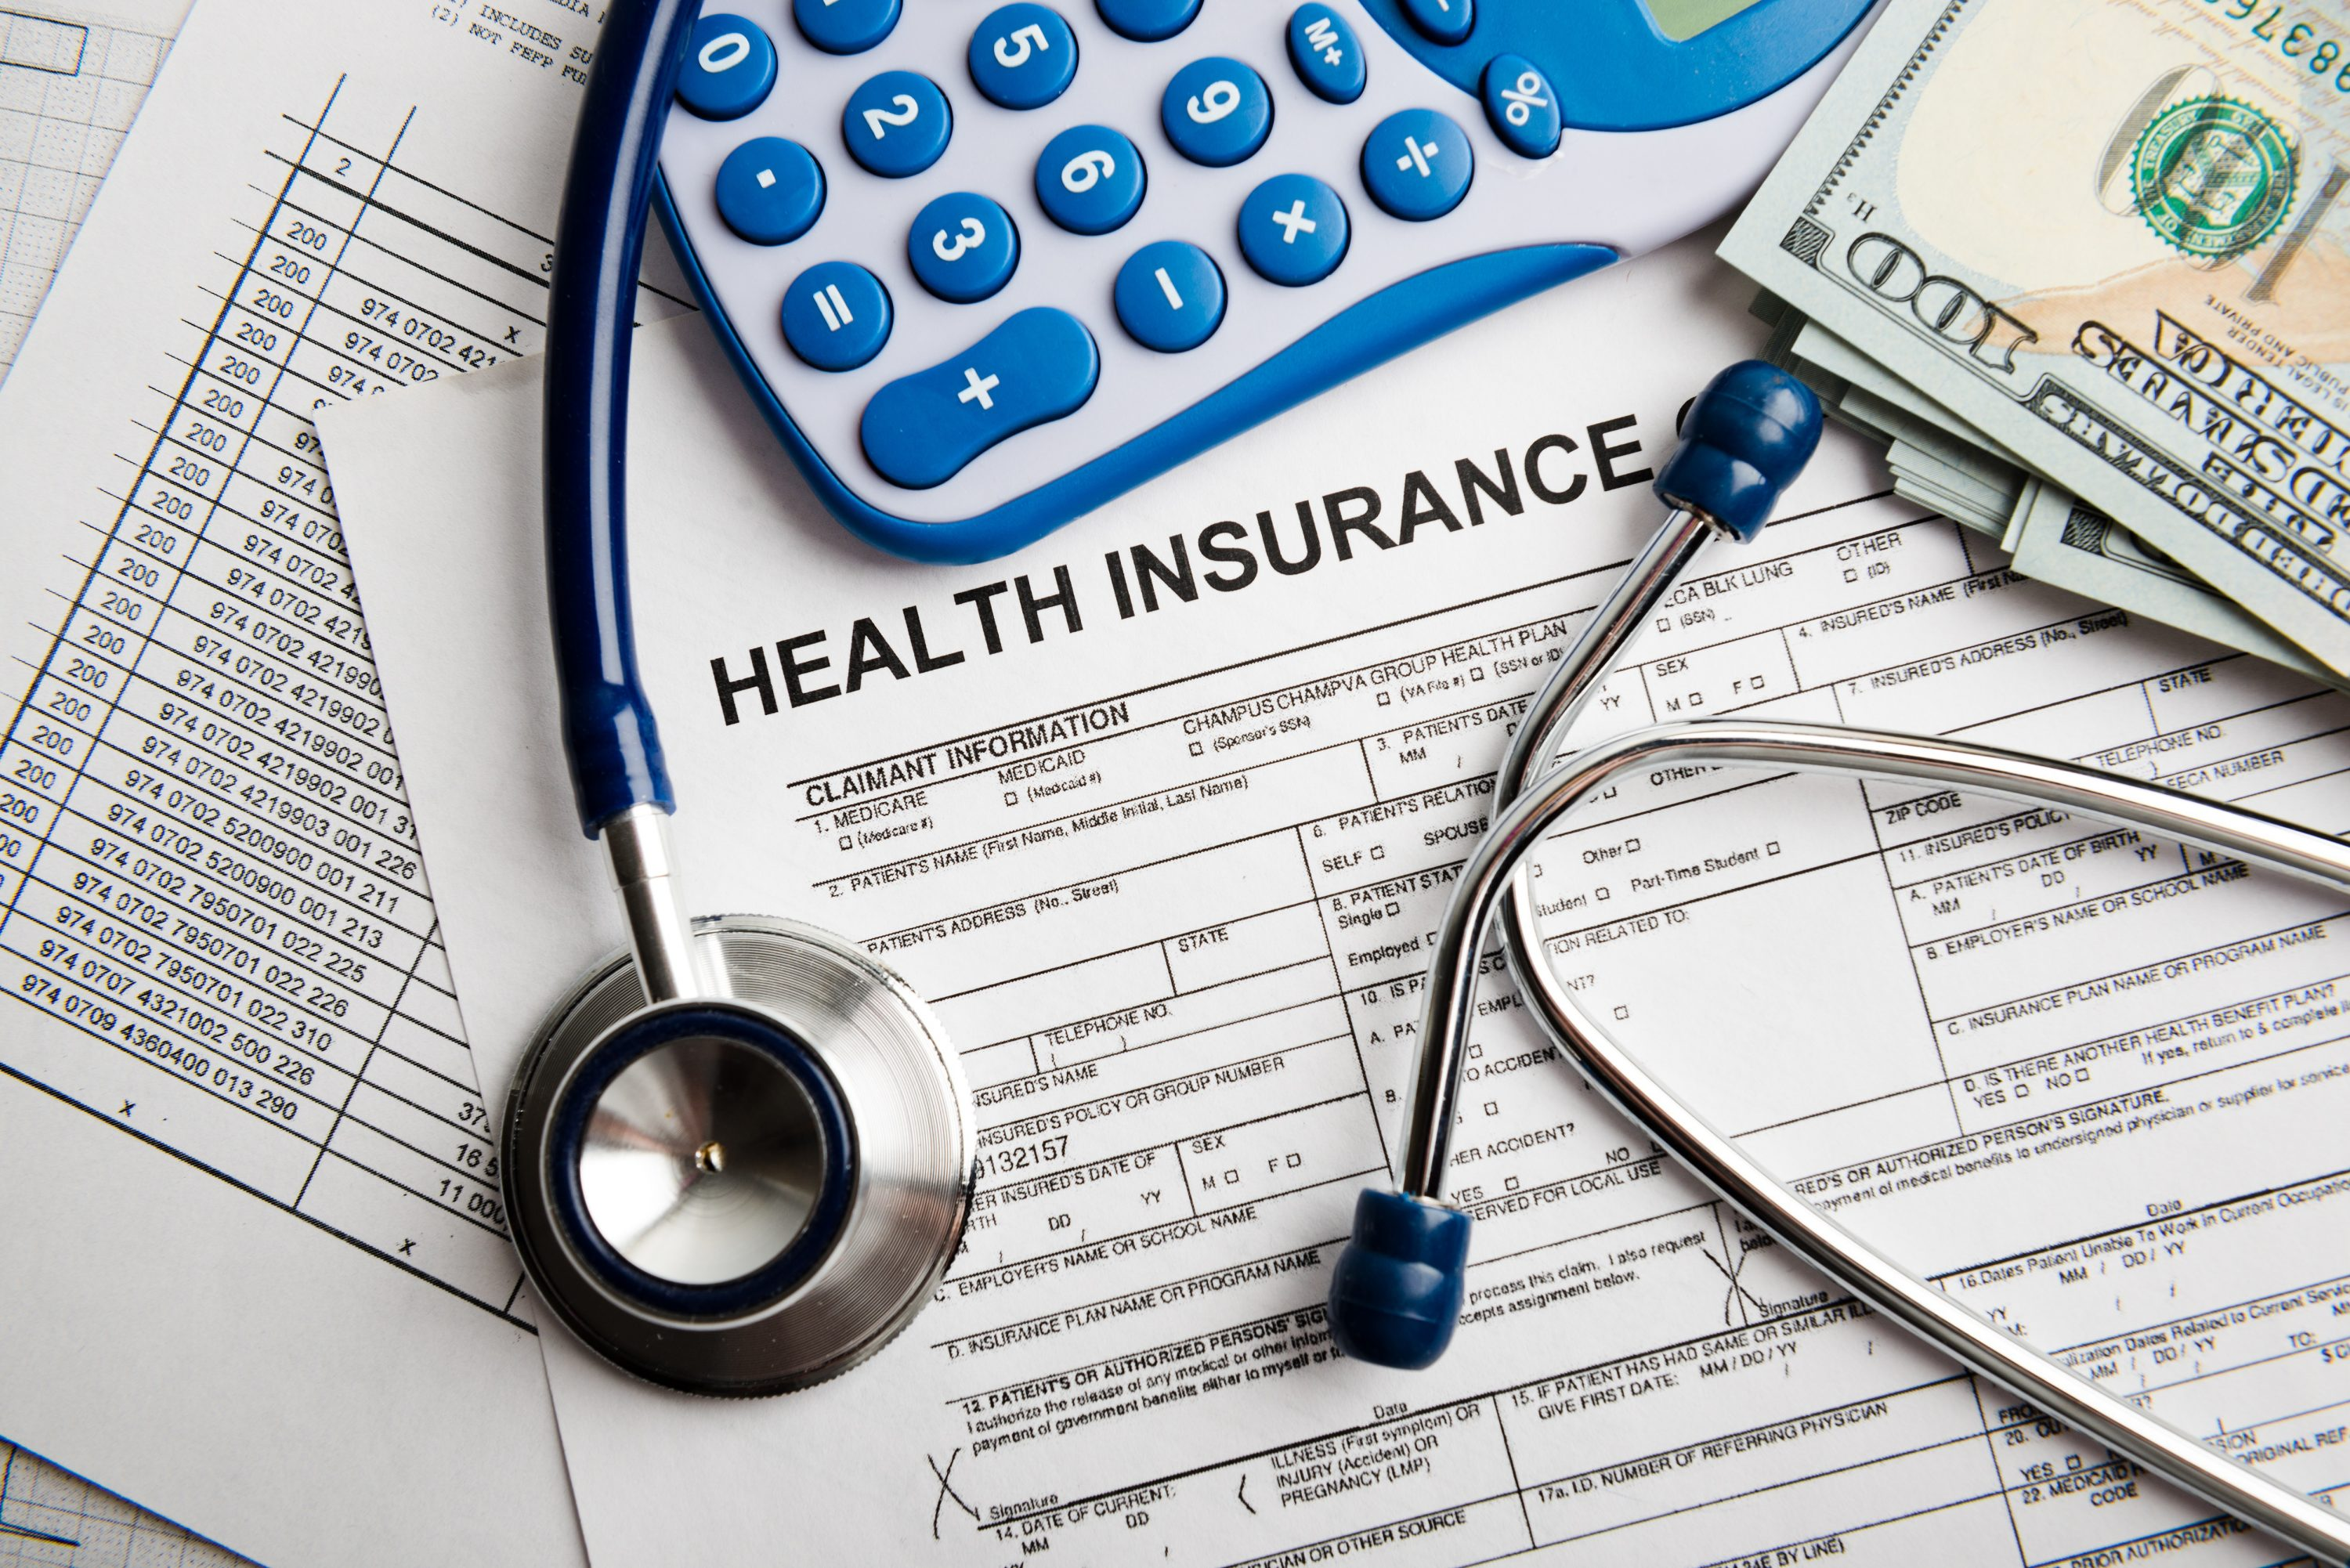



*   We are going to construct a Linear Regression model using a dataset related to medical expenses.
*   The treatment costs are influenced by a multitude of factors including diagnosis, clinic type, city of residence, and age. Although patient diagnoses aren't included in the data, we have access to other information that can assist us in drawing conclusions about the patients' health.

*   Our goal is to predict the healthcare costs for each individual covered by health insurance.





# Import Library and Dataset

In [1]:
#Data Manipulation
import numpy as np
import pandas as pd

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

plt.rcParams['figure.figsize'] = [7,5]
plt.rcParams['font.size'] =12
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [3]:
dataset = pd.read_csv("/content/insurance.csv")
df = dataset.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We need to pass 'dtype object' containing categorical or text components to numeric form.

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in the data set.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


If we compare 'mean' and '50%' in our data, we see that the values are close to each other. We can comment that outlier values are not available much.

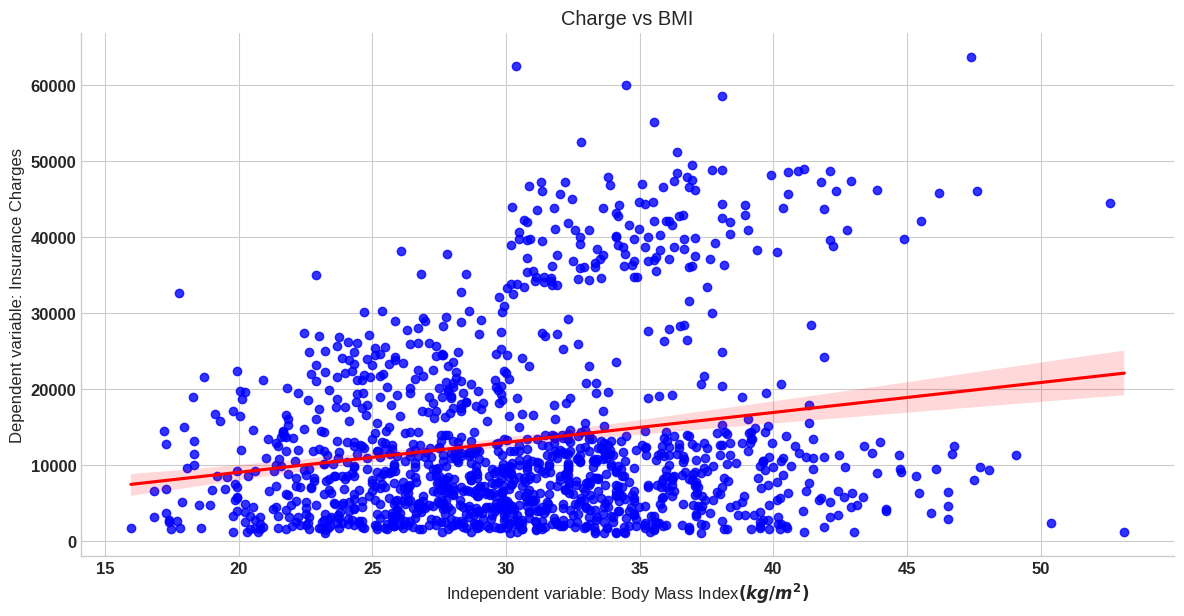

In [7]:
sns.lmplot(x='bmi',y='charges',data=df,
           aspect=2, height=6,
           line_kws={'color': 'red'},
           scatter_kws={'color': 'blue'})
plt.xlabel('Independent variable: Body Mass Index$(kg/m^2)$')
plt.ylabel('Dependent variable: Insurance Charges')
plt.title('Charge vs BMI');

The slope of the line indicates the rate at which Insurance Charges change for a unit change in BMI. If the slope is positive, it means that higher BMI tends to be associated with higher Insurance Charges.


**While the plot can show an association between BMI and Insurance Charges, it does not prove that changes in BMI directly cause changes in insurance charges. Other factors might also contribute to the observed relationship.**

# Coding Categorical Variables

**Label Encoding and One-Hot Encoding are two different methods used to convert categorical data into numerical format. Both methods are used to make categorical data suitable for machine learning models.**

In [8]:
# label encoding

def label_encoding(column_name):
  label_encoder = LabelEncoder()
  df[column_name] = label_encoder.fit_transform(df[column_name])

In [9]:
label_encoding("smoker")
label_encoding("sex")

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


<Axes: >

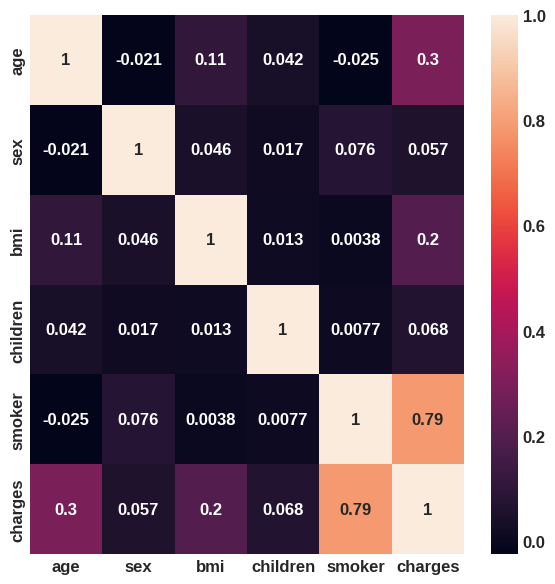

In [11]:
plt.figure(figsize = (7,7))
sns.heatmap(df.corr(), annot = True)

We cannot say that there is a strong relationship between these values and the related variables.

There just seems to be a strong correlation between smoker and charges.

In [12]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
#one-hot encoding

one_hot = pd.get_dummies(df["region"])
one_hot.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [14]:
df = pd.concat([df, one_hot], axis=1)
df.drop("region", axis=1, inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


We converted all categorical values to numeric values.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   uint8  
 7   northwest  1338 non-null   uint8  
 8   southeast  1338 non-null   uint8  
 9   southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [16]:
df['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

# Data Visualization and Interpretation

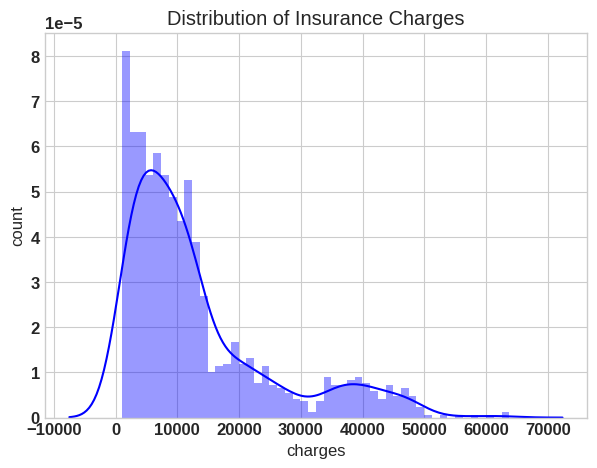

In [17]:
sns.distplot(df['charges'],bins=50,color='b')
plt.xlabel("charges")
plt.ylabel("count")
plt.title("Distribution of Insurance Charges");

When we examine the Distribution of Insurance Costs, we see that the graph is skewed to the right. In other words, the data points are denser on the left side of the graph, but the extreme values (outliers) are on the right.

In [18]:
df["smoker"].value_counts() # 0--> non-smoker,  1--> smoker

0    1064
1     274
Name: smoker, dtype: int64

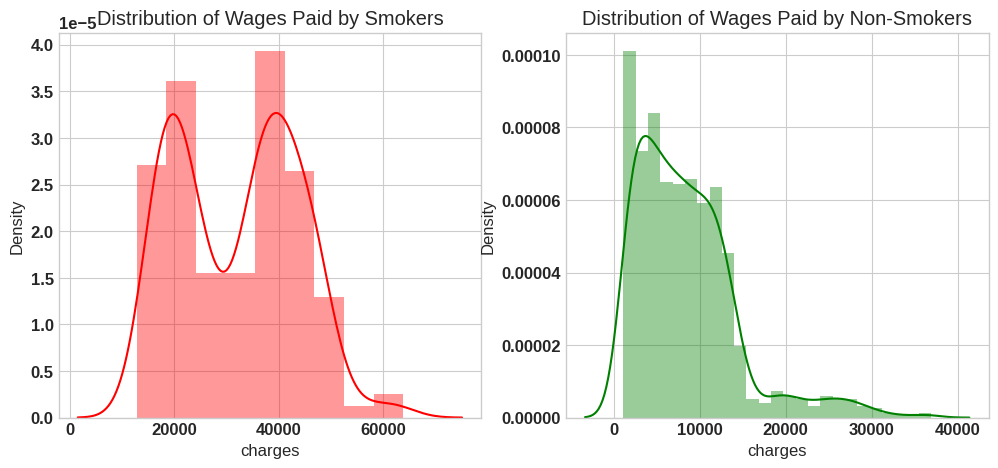

In [19]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='r',ax=ax)
ax.set_title('Distribution of Wages Paid by Smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='g',ax=ax)
ax.set_title('Distribution of Wages Paid by Non-Smokers');

Left Subplot (Smokers):

The charges' distribution appears to be positively skewed, meaning that the majority of charges are concentrated on the left side, and there's a long tail of higher charges on the right side.

Right Subplot (Non-Smokers):

Similar to the left subplot, the distribution is positively skewed, indicating that most charges are lower, but there are a few higher charges.

Overall:

The number of non-smokers is higher. Smokers spend more money on treatment.

In [20]:
df["sex"].value_counts()# Female--> 0, Male--> 1

1    676
0    662
Name: sex, dtype: int64

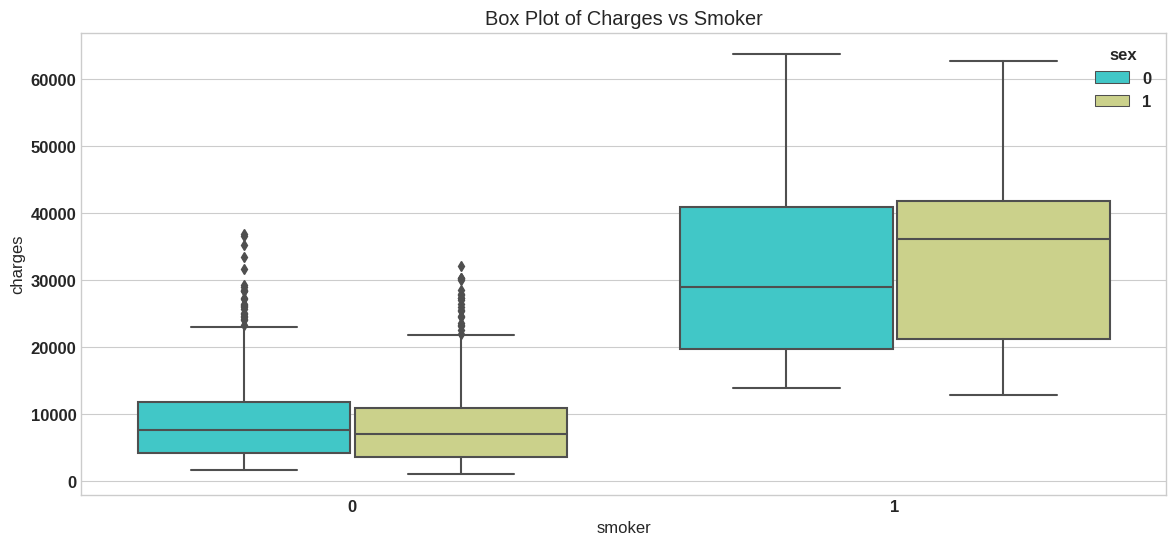

In [21]:
plt.figure(figsize=(14,6))
sns.boxplot(x='smoker', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box Plot of Charges vs Smoker');

When we examine the graph of non-smokers, female patients and male patients pay close to each other.

Among smokers, male patients spend more on treatment than female patients.

In [22]:
df["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

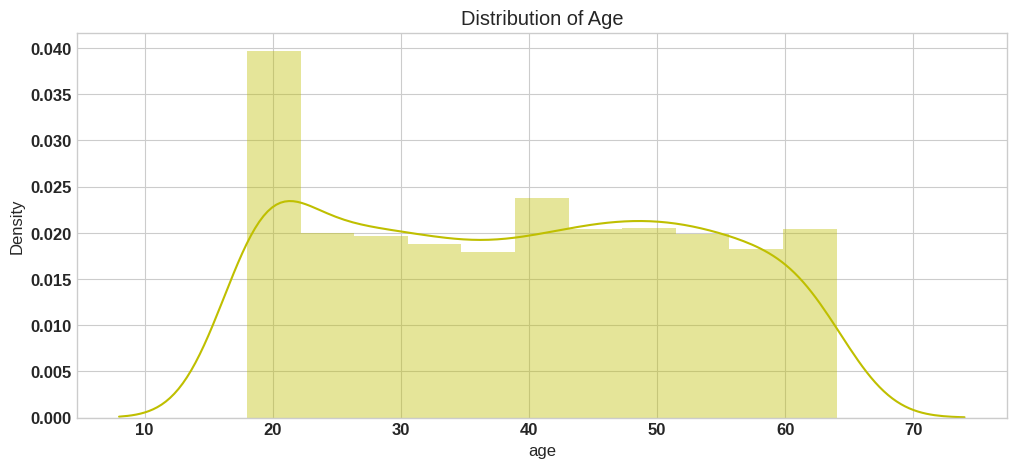

In [23]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Age")
ax = sns.distplot(df["age"], color = 'y');

This chart helps us understand the insured age distribution of the dataset. There is a distribution between the youngest 18 years old and the maximum 64 years old.

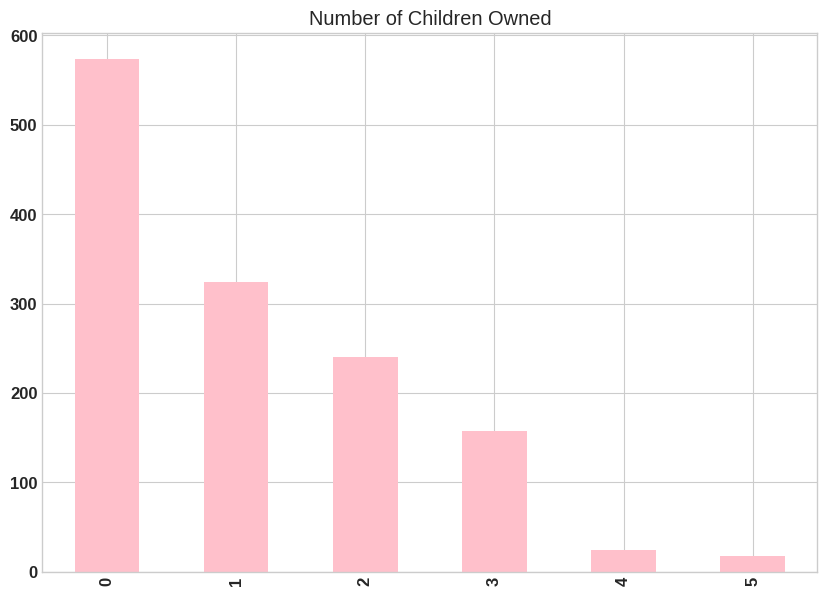

In [24]:
plt.figure(figsize=(10,7))
df["children"].value_counts().plot.bar(color='pink')
plt.title("Number of Children Owned");

Most individuals covered by health insurance have no children.

# Min-Max Scaling

**The purpose of using "MinMaxScaler()" is to provide a more balanced learning of the model by handling situations where different properties have different value ranges.**

In [25]:
X = df.drop("charges", axis=1)
y = df["charges"]

In [26]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0:5]

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


# Train Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [28]:
X_train.shape

(1070, 9)

In [29]:
X_test.shape

(268, 9)

# Model Building

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
predictions = model.predict(X_test)

In [32]:
comparison = pd.DataFrame({"Y Test": y_test[0:10].values,
                         "Predictions": predictions[0:10]})

In [33]:
comparison

,Y Test,Predictions
0,9095.06825,8969.550274
1,5272.17580,7068.747443
2,29330.98315,36858.410912
3,9301.89355,9454.678501
4,33750.29180,26973.173457
5,4536.25900,10864.113164
6,2117.33885,170.280841
7,14210.53595,16903.450287
8,3732.62510,1092.430936
9,10264.44210,11218.343184


# Model Evaluation

In [34]:
def regression_evaluation(preds):
  mse = mean_squared_error(y_test, preds)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_test, preds)
  mae = mean_absolute_error(y_test, preds)

  print(f"Mean Absolute Error: {mae} \nMean Squared Error: {mse} \nRoot Mean Squared Error: {rmse} \nR-Squared Value: {r_squared}")

In [35]:
regression_evaluation(predictions)

Mean Absolute Error: 4181.194473753643 
Mean Squared Error: 33596915.85136146 
Root Mean Squared Error: 5796.2846592762735 
R-Squared Value: 0.7835929767120723


Mean Absolute Error :

4172.49 The absolute error of the mean expresses in absolute value how far an estimate of it is from the true value in the model. This metric measures the average distance from the true values of forecasts. A low absolute mean error indicates indications of a better forecast.

Mean Squared Error :

33536693.48 The mean squared error measures how far the model's predictions are spread over their true values. It does the calculations by squaring the prediction errors and therefore gives greater weight to the large errors. A lower mean square error reflects a better model.

Root Mean Squared Error :

5791.09 The root square error is calculated by taking the square root of the mean square error. This metric shows the results of the error terms to the original data units and the average size of their predicted errors. A lower root mean square error reflects a better model.

R-Squared Value :

0.784 The R-squared value indicates how much of the variation of the dependent variable can be explained by the model. An R-squared value closer to 1 indicates that the model explains most of the amount of data, while a lower R-squared value indicates less explanatory power. A value of 0.784 indicates that the model's estimates can explain 78.4% of the variability of the dependent variable.

 **As a result, all of these metrics help to evaluate the presentation of the model from different angles. Low errors and high R-squared value reflect the effect of a better model.**

Thank you !